In [332]:
import pandas as pd

In [709]:
data = pd.read_csv('TrainingSample.csv',sep=';')

In [710]:
data = data[data.age<130]
data = data[data.work_experience>=0]

In [711]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [713]:
names = data.columns.values[2:]
from scipy.stats import spearmanr
for i in range(7):
    for j in range(7):
        correlation.itemset(i,j,spearmanr(data[names[j]],data[names[i]])[0])
pd.DataFrame(correlation,index=names, columns=names)

,income,expenditures,loan_amount,loan_installment,Collateral_value,age,work_experience
income,1.000000,0.673931,0.193889,0.480385,0.278288,0.057412,0.274490
expenditures,0.673931,1.000000,0.248074,0.366957,0.154540,0.117954,0.120038
loan_amount,0.193889,0.248074,1.000000,0.044956,0.589033,0.166353,0.148555
loan_installment,0.480385,0.366957,0.044956,1.000000,-0.075437,-0.045305,0.036099
Collateral_value,0.278288,0.154540,0.589033,-0.075437,1.000000,0.135294,0.186751
age,0.057412,0.117954,0.166353,-0.045305,0.135294,1.000000,0.749004
work_experience,0.274490,0.120038,0.148555,0.036099,0.186751,0.749004,1.000000


In [364]:
from sklearn import preprocessing
x = data.values
name = data.columns.values[2:]
x = preprocessing.scale(x[:,2:])
y = data['Default']
data = pd.DataFrame(x,columns = name)

In [365]:
X = data.ix[:,0]
X = X.reshape(len(data),1)
Y = data.ix[:,1]
Y = Y.reshape(len(data),1)

In [366]:
from sklearn.linear_model import LinearRegression

In [367]:
LR = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)

In [368]:
LR.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [369]:
alpha = LR.coef_[0]

In [370]:
X = data.ix[:,5]
X = X.reshape(len(data),1)
Y = data.ix[:,5]
Y = Y.reshape(len(data),1)
LR = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
LR.fit(X,Y)
beta = LR.coef_[0]

In [371]:
for i in range(len(data)):
    data.set_value(i,"expenditures",-data.get_value(i,"expenditures")+alpha*data.get_value(i,"income"))
    data.set_value(i,"work_experience",-data.get_value(i,"work_experience")+beta*data.get_value(i,"age"))

In [372]:
data = data[['expenditures', 'loan_amount', 'loan_installment',
       'Collateral_value', 'work_experience']]

In [373]:
X = data.ix[:,:]

In [374]:
LR.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [375]:
data2 = pd.read_csv('ValidationSample.csv',sep=';')
data2 = data2[data2.age<130];
data2 = data2[data2.work_experience>=0];
from sklearn import preprocessing
x = data2.values
name2 = data2.columns.values[2:]
x = preprocessing.scale(x[:,2:])
y_new = data2["Default"]
data2 = pd.DataFrame(x,columns = name2)
for i in range(len(data2)):
    data2.set_value(i,"expenditures",-data2.get_value(i,"expenditures")+alpha*data2.get_value(i,"income"))
    data2.set_value(i,"work_experience",-data2.get_value(i,"work_experience")+beta*data2.get_value(i,"age"))
data2 = data2[['expenditures', 'loan_amount', 'loan_installment',
       'Collateral_value', 'work_experience']]
X_new = data2.ix[:,:]

In [376]:
y_pred = LR.predict(X_new)
y_pred = np.round(y_pred)

In [377]:
t=0
for i in range(len(y_pred)):
    if y_pred[i]==y_new[i]:
        t = t + 1

In [378]:
t

82

In [337]:
data

,ID,Default,income,expenditures,loan_amount,loan_installment,Collateral_value,age,work_experience
0,t1,1,7091,2715,10200,4663,13164,44,15
1,t2,1,7760,2388,12200,3066,22787,43,21
2,t3,1,3239,2315,10000,1022,9070,46,26
4,t5,1,2889,1024,9600,1668,33165,44,15
5,t6,1,6498,3192,6600,2461,8866,45,18
6,t7,0,3057,979,7400,2679,5059,20,2
7,t8,0,4104,1998,6400,2655,17500,29,6
8,t9,0,3712,4721,8300,2001,6371,20,2
9,t10,1,3991,1531,9500,1461,11544,54,16
10,t11,1,6973,3781,8200,3334,10125,57,24


In [257]:
len(data)

99

# How exp depend on income?

In [451]:
data = pd.read_csv('TrainingSample.csv',sep=';')
data = data[data.age<130]
data = data[data.work_experience>=0]

In [452]:
X = data['income'].values.reshape(len(data),1)

In [453]:
y = data['expenditures'].values.reshape(len(data),1)

In [454]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
LR.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [455]:
alpha = LR.coef_[0][0]

In [456]:
LR.coef_[0][0]

0.45045903468191256

Exp = 0.45*income + N(0,...)

In [457]:
for i in range(len(y)):
    y[i] = y[i] - alpha*X[i]

In [458]:
y = np.sort(y.reshape(1,99)).reshape(99,1)

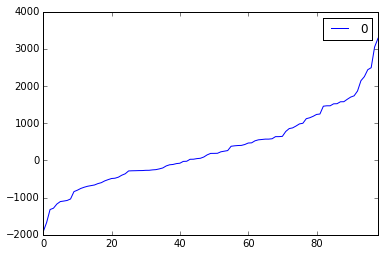

In [459]:
pd.DataFrame(y).plot()

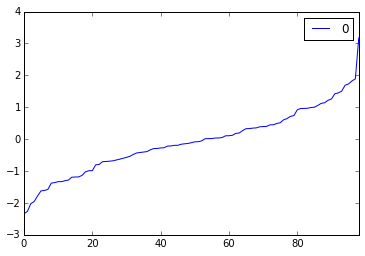

In [460]:
test = np.random.normal(size=(1,99))
test = np.sort(test).reshape(99,1)
pd.DataFrame(test).plot()

# Now the same with age and work experience

In [707]:
data = pd.read_csv('TrainingSample.csv',sep=';')
data = data[data.age<130]
data = data[data.work_experience>=0]

In [708]:
X = data['age'].values.reshape(len(data),1)
for i in range(len(X)):
    X[i] = X[i] - 18
y = data['work_experience'].values.reshape(len(data),1)
LR = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
LR.fit(X,y)
alpha2 = LR.coef_[0][0]
print alpha2, LR.intercept_

0.375775579424 [-3.1237251]


It seems to be quite random. Pointless

# Amount vs Installment

In [602]:
data = pd.read_csv('TrainingSample.csv',sep=';')
data = data[data.age<130]
data = data[data.work_experience>=0]

In [604]:
X = data['Collateral_value'].values.reshape(len(data),1)
y = data['loan_amount'].values.reshape(len(data),1)
LR = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
LR.fit(X,y)
alpha2 = LR.coef_[0][0]
print alpha2
print LR.coef_

0.0474112387527
[[ 0.04741124]]


In [596]:
Z = np.zeros(len(X))
for i in range(len(X)):
    Z[i] = y[i] - alpha2*X[i]

In [599]:
y

array([[10200],
       [12200],
       [10000],
       [ 9600],
       [ 6600],
       [ 7400],
       [ 6400],
       [ 8300],
       [ 9500],
       [ 8200],
       [14500],
       [ 8100],
       [10500],
       [ 8300],
       [11400],
       [ 8800],
       [13300],
       [ 4500],
       [11500],
       [ 8500],
       [ 8100],
       [ 7800],
       [10000],
       [ 5000],
       [14800],
       [ 6000],
       [ 2900],
       [ 7700],
       [ 5000],
       [11500],
       [ 6900],
       [12600],
       [ 4900],
       [ 9000],
       [ 6600],
       [11400],
       [ 4900],
       [10300],
       [ 9700],
       [13400],
       [10600],
       [11100],
       [ 8200],
       [ 7500],
       [15000],
       [16300],
       [ 7800],
       [ 6900],
       [ 8000],
       [ 8600],
       [12400],
       [11100],
       [ 9100],
       [ 8800],
       [10000],
       [11200],
       [17300],
       [10700],
       [14100],
       [ 7500],
       [ 7600],
       [11600],
       [

# Let's change vars to exp-income and income. They're probably independent

In [513]:
alpha3 = 0.368601456472491
alpha4 = -2.84978727246436

In [1090]:
data = pd.read_csv('TrainingSample.csv',sep=';')
#data2 = pd.DataFrame(data.values[90:,:])
#data2.columns = data.columns.values
#data = pd.DataFrame(data = data.values[0:90,:])
#data.columns = data2.columns.values
for i in range(len(data)):
    data.set_value(i,"expenditures",data.get_value(i,"expenditures") + data.get_value(i,"loan_installment")-alpha2*data.get_value(i,"income") - inter2)
    data.set_value(i,"loan_installment",0)
    #data.set_value(i,"income",0)
    data.set_value(i,"Collateral_value",(data.get_value(i,"Collateral_value") / data.get_value(i,"loan_amount")) )
    data.set_value(i,"loan_amount",0)
    #data.set_value(i,"work_experience", 2*(int(data.get_value(i,"work_experience") - 0.37577*(data.get_value(i,"age") - 18) >= 0) -0.5) )
    #data.set_value(i,"age",0)
    #data.set_value(i,"work_experience", int(data.get_value(i,"work_experience") > 7))
    #data.set_value(i,"expenditures",data.get_value(i,"expenditures")-alpha*data.get_value(i,"income"))
    #data.set_value(i,"work_experience",data.get_value(i,"work_experience")-alpha2*(data.get_value(i,"age")-18))
data = data[data['age']<130]
data = data[data['work_experience']>=0]

In [1091]:
X = data.ix[:,2:]
y = data.ix[:,1]
LR = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
LR.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [1092]:
data2 = pd.read_csv('ValidationSample.csv',sep=';')
data2 = data2[data2.age<130]
data2 = data2[data2.work_experience>=0]
for i in range(len(data2)):
    data2.set_value(i,"expenditures",data2.get_value(i,"expenditures") + data2.get_value(i,"loan_installment")-alpha2*data2.get_value(i,"income") - inter2)
    data2.set_value(i,"loan_installment",0)
    #data2.set_value(i,"income",0)
    data2.set_value(i,"Collateral_value",(data2.get_value(i,"Collateral_value") / data2.get_value(i,"loan_amount")))
    data2.set_value(i,"loan_amount",0)
    #data2.set_value(i,"work_experience", 2*(int(data2.get_value(i,"work_experience") - 0.37577*(data2.get_value(i,"age") - 18) >= 0) -0.5) )
    #data2.set_value(i,"age",0)
    #data2.set_value(i,"work_experience", int(data.get_value(i,"work_experience") > 7))
    #data2.set_value(i,"expenditures",data2.get_value(i,"expenditures")-alpha*data2.get_value(i,"income"))
    #data2.set_value(i,"work_experience",data2.get_value(i,"work_experience")-alpha2*(data2.get_value(i,"age")-18))

X_new = data2.ix[:,2:]
y_new = data2.ix[:,1]
y_pred = LR.predict(X_new)
for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
        y_pred[i] = 1;
    else:
        y_pred[i]=0;

In [1093]:
f = 0
t = 0
for i in range(len(data2)):
    if y_pred[i] == y_new[i]:
        f = f+1
print f , 100-f

97 3


In [1036]:
names = data.columns.values[2:]
from scipy.stats import spearmanr
for i in range(7):
    for j in range(7):
        correlation.itemset(i,j,spearmanr(data[names[j]],data[names[i]])[0])
pd.DataFrame(correlation,index=names, columns=names)

,income,expenditures,loan_amount,loan_installment,Collateral_value,age,work_experience
income,1.000000,-0.017718,NaN,NaN,0.216247,NaN,0.274490
expenditures,-0.017718,1.000000,NaN,NaN,0.025498,NaN,-0.106681
loan_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_installment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Collateral_value,0.216247,0.025498,NaN,NaN,1.000000,NaN,0.122582
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_experience,0.274490,-0.106681,NaN,NaN,0.122582,NaN,1.000000


And this gives NO effect to the result.

In [1004]:
alpha2

0.81874286866708823

In [703]:
LR.coef_

array([  1.65323433e-04,  -1.21173405e-04,   9.57362684e-06,
         1.27576517e-16,   3.55704288e-06,  -7.72477131e-04,
         2.07733384e-02])

In [645]:
from scipy.stats import pearsonr
for i in range(7):
    for j in range(7):
        correlation.itemset(i,j,pearsonr(data[names[j]],data[names[i]])[0])
pd.DataFrame(correlation,index=names, columns=names)

,income,expenditures,loan_amount,loan_installment,Collateral_value,age,work_experience
income,1.000000,0.683205,0.208848,0.589286,0.135607,0.054639,0.281157
expenditures,0.683205,1.000000,0.253553,0.341564,0.108875,0.126210,0.149087
loan_amount,0.208848,0.253553,1.000000,0.023853,0.298535,0.153923,0.111667
loan_installment,0.589286,0.341564,0.023853,1.000000,-0.054245,0.005064,0.075600
Collateral_value,0.135607,0.108875,0.298535,-0.054245,1.000000,-0.087810,-0.041841
age,0.054639,0.126210,0.153923,0.005064,-0.087810,1.000000,0.672987
work_experience,0.281157,0.149087,0.111667,0.075600,-0.041841,0.672987,1.000000


In [673]:
data = pd.read_csv('TrainingSample.csv',sep=';')
data = data[data['age']<130]

In [680]:
for i in range(8):
    print i

0
1
2
3
4
5
6
7


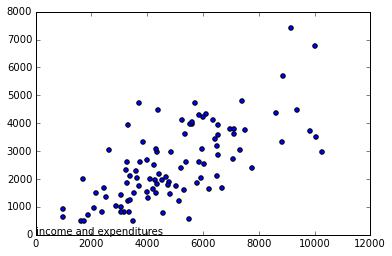

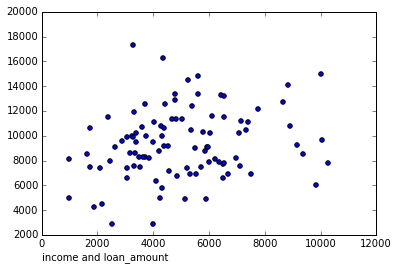

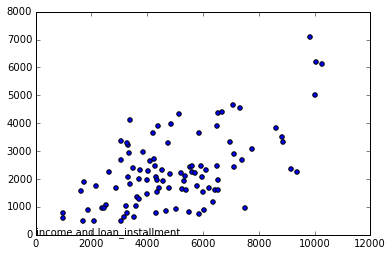

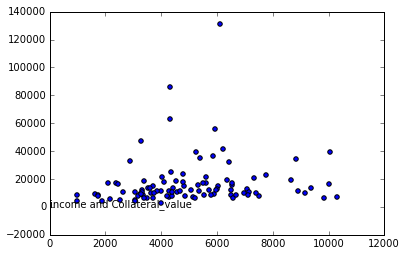

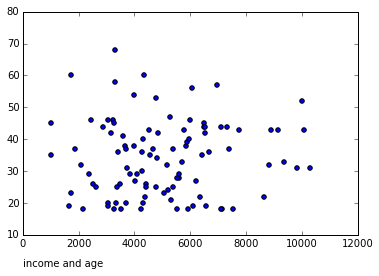

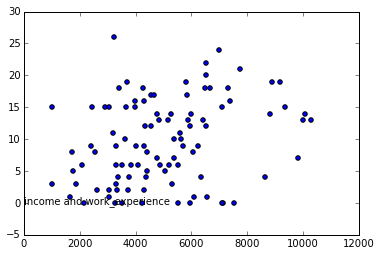

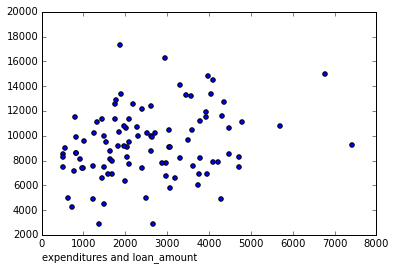

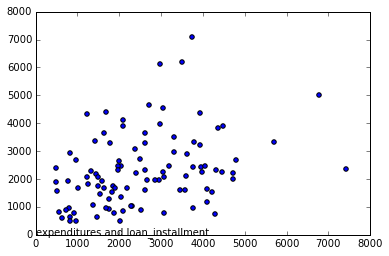

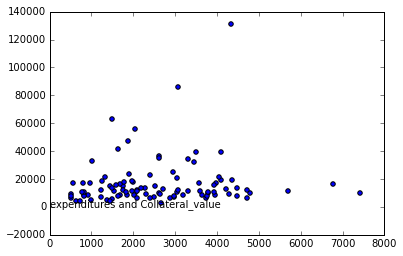

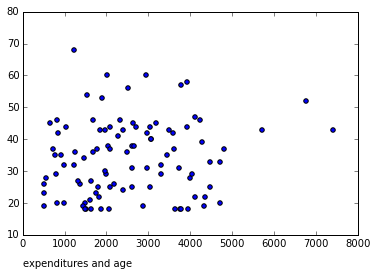

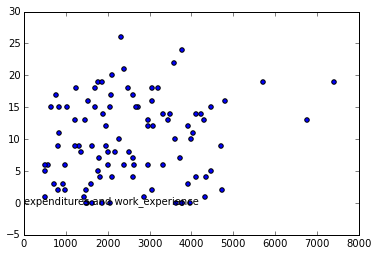

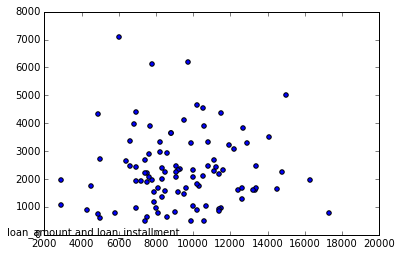

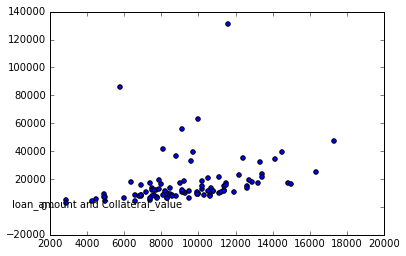

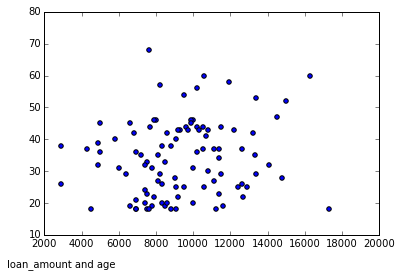

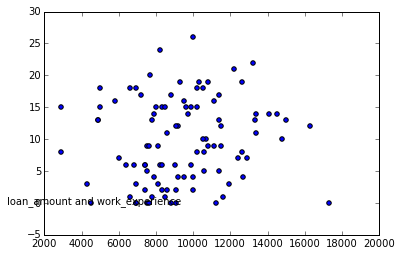

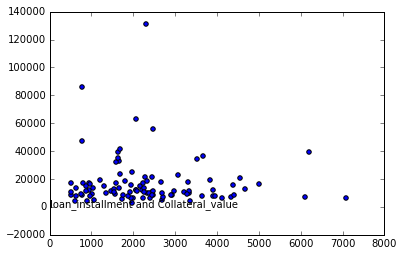

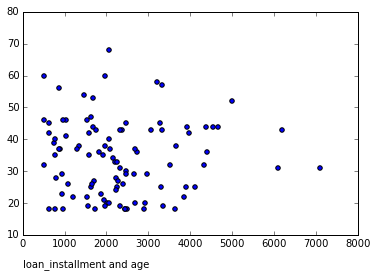

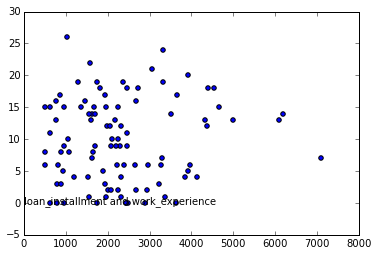

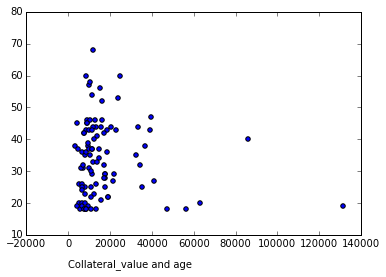

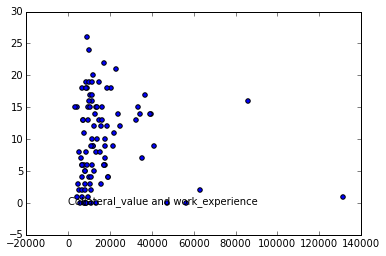

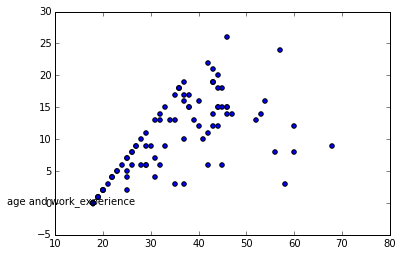

In [689]:
names = data.columns.values
index = 0;
for i in range(2,9):
    for j in range(i+1,9):
        if i!=j:
            plt.figure(index)
            plt.scatter(data.ix[:,i],data.ix[:,j])
            plt.text(0,0,names[i]+' and '+names[j])
            index = index + 1

In [613]:
data.columns.values

array(['ID', 'Default', 'income', 'expenditures', 'loan_amount',
       'loan_installment', 'Collateral_value', 'age', 'work_experience'], dtype=object)

In [617]:
X = data.ix[:,4]
Y = data.ix[:,6]
for i in length(X):
    

In [618]:
data = pd.read_csv('TrainingSample.csv',sep=';')
data = data[data.age<130]
data = data[data.work_experience>=0]

In [619]:
X = data['Collateral_value'].values.reshape(len(data),1)
y = data['loan_amount'].values.reshape(len(data),1)
LR = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
LR.fit(X,y)
alpha2 = LR.coef_[0][0]
print alpha2
print LR.coef_

0.0474112387527
[[ 0.04741124]]


In [625]:
Z = zeros(len(X))
for i in range(len(X)):
    Z[i] = -alpha2*X[i]+y[i]

In [641]:
Z = np.sort(Z)
print pd.DataFrame(Z).mean()
print pd.DataFrame(Z).std()
Z2 = np.random.normal(loc = pd.DataFrame(Z).mean() , scale = pd.DataFrame(Z).std() , size = (1,99))
Z2 = np.sort(Z2).reshape((99,1))

0    8549.471394
dtype: float64
0    2647.62301
dtype: float64


<function matplotlib.pyplot.show>

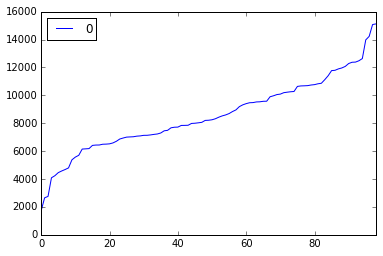

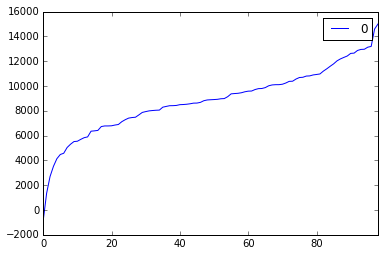

In [644]:
plt.figure(1)
pd.DataFrame(Z).plot()
plt.figure(2)
pd.DataFrame(Z2).plot()
plt.show

In [742]:
data = pd.read_csv('TrainingSample.csv',sep=';')
data = data[data.age<130]
data = data[data.work_experience>=0]

X = data['income'].values.reshape(len(data),1)
z = data['loan_installment'].values.reshape(len(data),1)
y = data['expenditures'].values.reshape(len(data),1)
for i in range(len(z)):
    y[i] = y[i] + z[i];
print pearsonr(X,y)
LR = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
LR.fit(X,y)
alpha2 = LR.coef_[0][0]
inter2 = LR.intercept_[0]
print alpha2
print LR.coef_
print LR.intercept_

(array([ 0.77824231]), array([  2.58931533e-21]))
0.818742868667
[[ 0.81874287]]
[ 766.63991914]


In [671]:
data = pd.read_csv('TrainingSample.csv',sep=';')
data = data[data.age<130]
data = data[data.work_experience>=0]

X = data['income'].values.reshape(len(data),1)
z = data['expenditures'].values.reshape(len(data),1)
t = data['work_experience'].values.reshape(len(data),1)
y = data['Collateral_value'].values.reshape(len(data),1)
for i in range(len(z)):
    X[i] = (X[i] - z[i])*t[i];
print pearsonr(X,y)
LR = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
LR.fit(X,y)
alpha2 = LR.coef_[0][0]
inter2 = LR.intercept_[0]
print alpha2
print LR.coef_
print LR.intercept_

(array([ 0.00151477]), array([ 0.98812762]))
0.000995689735393
[[ 0.00099569]]
[ 16933.11358065]


# Tree Classifier

In [948]:
from sklearn import tree
data = pd.read_csv('TrainingSample.csv',sep=';')
data = data[data.age<130]
data = data[data.work_experience>=0]
X = data.ix[:,2:]
y = data.ix[:,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.feature_importances_

array([ 0.30953165,  0.13128391,  0.01740506,  0.03030193,  0.13703255,
        0.03132911,  0.34311579])

In [965]:
a = data.ix[:,1]
b = data.ix[:,8]
c = data.ix[:,7]
    

AttributeError: 'numpy.int64' object has no attribute 'set_value'

In [996]:
exp = pd.DataFrame(data = a , columns = ['def','age','exp','norm_exp','diff'] , index = a.index , copy = True)
for i in a.index:
    exp.set_value(i,'def',a[i])
    exp.set_value(i,'exp',b[i])
    exp.set_value(i,'age',c[i])
    exp.set_value(i,'norm_exp',0.37577*(c[i]-18))
    #exp.set_value(i,'diff',2*( int(b[i] - 0.37577*(c[i]-18) >= 0) - 0.5))
    exp.set_value(i,'diff',b[i] - 0.37577*(c[i]-18))

In [997]:
len(exp[exp['def'] == 0])

20

In [998]:
exp2 = exp[exp['def'] == 0]
exp2

,def,age,exp,norm_exp,diff
6,0,20,2,0.75154,1.24846
7,0,29,6,4.13347,1.86653
8,0,20,2,0.75154,1.24846
18,0,18,0,0,0
20,0,19,1,0.37577,0.62423
21,0,35,3,6.38809,-3.38809
35,0,19,1,0.37577,0.62423
41,0,60,8,15.78234,-7.78234
43,0,29,6,4.13347,1.86653
50,0,20,2,0.75154,1.24846


In [999]:
exp3 = exp[exp['def']==1]
#exp3[exp3['exp']<8]
exp3[exp3['diff']<=3]

,def,age,exp,norm_exp,diff
9,1,54,16,13.52772,2.47228
23,1,20,2,0.75154,1.24846
26,1,31,7,4.88501,2.11499
30,1,44,12,9.77002,2.22998
31,1,18,0,0,0
34,1,28,6,3.7577,2.2423
40,1,53,14,13.15195,0.84805
44,1,18,0,0,0
45,1,52,13,12.77618,0.22382
46,1,60,12,15.78234,-3.78234


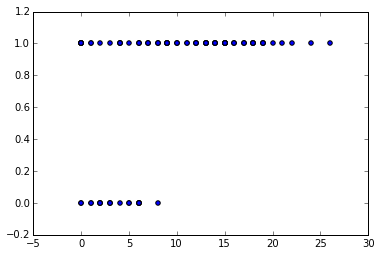

In [1042]:
plt.scatter(b,a)

In [1089]:
data = pd.read_csv('TrainingSample.csv',sep=';')
names = data.columns.values
data = data[data.age<130]
data = data[data.work_experience>=0]
y = data.ix[:,1]

data2 = pd.read_csv('ValidationSample.csv',sep=';')
data2 = data2[data2.age<130]
data2 = data2[data2.work_experience>=0]
y_new = data2.ix[:,1]
LRT = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1);
for i in range(2,9):
    X = data.ix[:,i].reshape(99,1)
    X_new = data2.ix[:,i].reshape(100,1)
    LRT.fit(X,y)
    f = 0
    y_pred = LRT.predict(X_new)
    for j in range(len(y_pred)):
        if y_pred[j]>=0.5:
            y_pred[j] = 1;
        else:
            y_pred[i]=0;
    for j in data2.index:
        if y_pred[j] == y_new[j]:
            f = f+1
    print f , 100-f , names[i]

77 23 income
80 20 expenditures
80 20 loan_amount
80 20 loan_installment
80 20 Collateral_value
80 20 age
80 20 work_experience
